In [2]:
# Test imports
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes import *
from clean_ndes import *

print("✓ Package imported successfully!")
print(f"Config: N={N_TRAJECTORIES}, T={T_TIME_STEPS}, D={D_DIMENSIONS}")

✓ Package imported successfully!
Config: N=1000, T=183, D=7


In [3]:
import numpy as np

# Generate synthetic data
np.random.seed(SEED)
data, adherence_dropped_at = generate_synthetic_data_super_simple(
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
)

print(f"✓ Data generated: shape={data.shape}")
print(f"  Adherence drops: {len(adherence_dropped_at)}")

✓ Data generated: shape=(1000, 183, 7)
  Adherence drops: 90542


In [4]:
# Create model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)

# Test forward pass
import torch
dummy_input = torch.randn(7)
logits = model(dummy_input)
print(f"✓ Model forward: input shape={dummy_input.shape}, output shape={logits.shape}")

# Test inference
prediction = model.inference(dummy_input)
print(f"✓ Model inference: predicted class={prediction.item()}")

✓ Model forward: input shape=torch.Size([7]), output shape=torch.Size([2])
✓ Model inference: predicted class=0


In [5]:
from torch.utils.data import DataLoader

# Test intra-trajectory dataset
dataset_intra = SampledLength2AdherenceDataset(data)
X, Y = dataset_intra[0]
print(f"✓ Intra dataset: sample shapes X={X.shape}, Y={Y.shape}")

# Test inter-trajectory dataset  
dataset_inter = AdherenceDataset(data)
X, Y = dataset_inter[0]
print(f"✓ Inter dataset: sample shapes X={X.shape}, Y={Y.shape}")

✓ Intra dataset: sample shapes X=torch.Size([2, 6]), Y=torch.Size([2])
✓ Inter dataset: sample shapes X=torch.Size([183, 6]), Y=torch.Size([183])


In [6]:
# Create dummy data
batch_size, T, n_classes = 5, 10, 2
outputs = torch.randn(batch_size, T, n_classes)
labels = torch.randint(0, n_classes, (batch_size, T))

# Test losses
train_loss = get_batch_loss(outputs, labels)
val_loss = get_batch_loss_validation(outputs, labels)

print(f"✓ Train loss: {train_loss.item():.4f}")
print(f"✓ Val loss: {val_loss.item():.4f}")

✓ Train loss: 0.8275
✓ Val loss: 1.4261


In [7]:
from torch.utils.data import random_split

# Setup small dataset
N_test, T_test = 100, 10
data_test, _ = generate_synthetic_data_super_simple(N_test, T_test, D_DIMENSIONS)
dataset_test = SampledLength2AdherenceDataset(data_test)

train_size = int(0.8 * len(dataset_test))
val_size = len(dataset_test) - train_size
train_set, val_set = random_split(dataset_test, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10, shuffle=False)

# Train model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)
train_losses, val_losses = train_one_epoch(
    model, train_loader, val_loader, learning_rate=0.001, verbose=False
)

print(f"✓ Training complete: {len(train_losses)} batches")
print(f"  Final train loss: {train_losses[-1]:.4f}")
print(f"  Final val loss: {val_losses[-1]:.4f}")

✓ Training complete: 72 batches
  Final train loss: 0.1611
  Final val loss: 0.0000


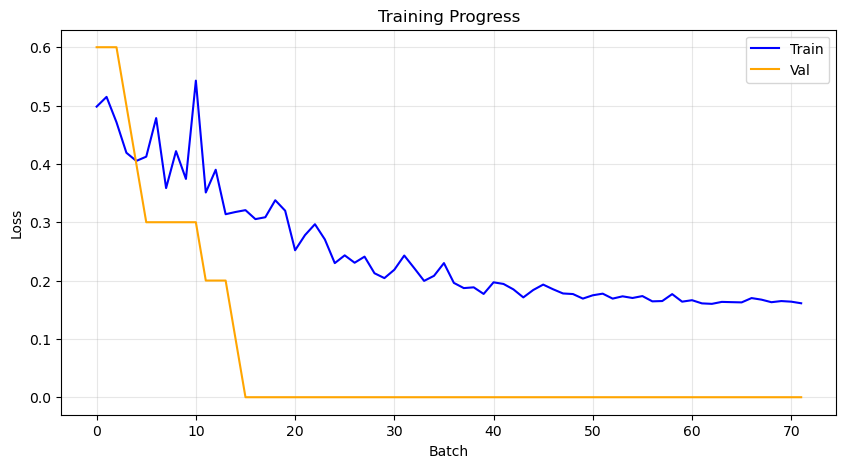

✓ Visualization complete!


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train', color='blue')
plt.plot(val_losses, label='Val', color='orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Visualization complete!")

### comparison inter intra sampling 

Adherence Prediction: Intra vs Inter-trajectory Sampling Comparison

Generating synthetic data:
  N trajectories: 1000
  T time steps: 183
  D dimensions: 7
  Adherence drops: 90542

--------------------------------------------------------------------------------
INTRA-TRAJECTORY SAMPLING
--------------------------------------------------------------------------------
Intra-trajectory sampling:
  Training set size: 800
  Validation set size: 200
Batch 0: val_loss = 0.6500
Batch 0: train_loss = 0.5133
Batch 1: val_loss = 0.5000
Batch 1: train_loss = 0.4894
Batch 2: val_loss = 0.4500
Batch 2: train_loss = 0.4652
Batch 3: val_loss = 0.4000
Batch 3: train_loss = 0.4744
Batch 4: val_loss = 0.3000
Batch 4: train_loss = 0.4107
Batch 5: val_loss = 0.3000
Batch 5: train_loss = 0.4117
Batch 6: val_loss = 0.2000
Batch 6: train_loss = 0.4133
Batch 7: val_loss = 0.2000
Batch 7: train_loss = 0.3915
Batch 8: val_loss = 0.2000
Batch 8: train_loss = 0.3643
Batch 9: val_loss = 0.1500
Batch 9: train_loss

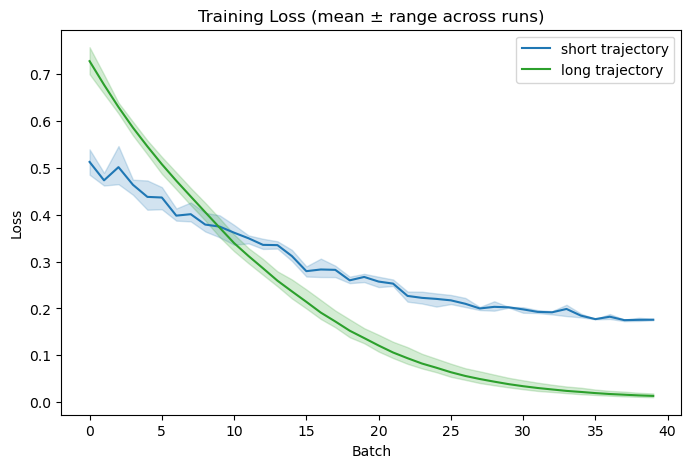

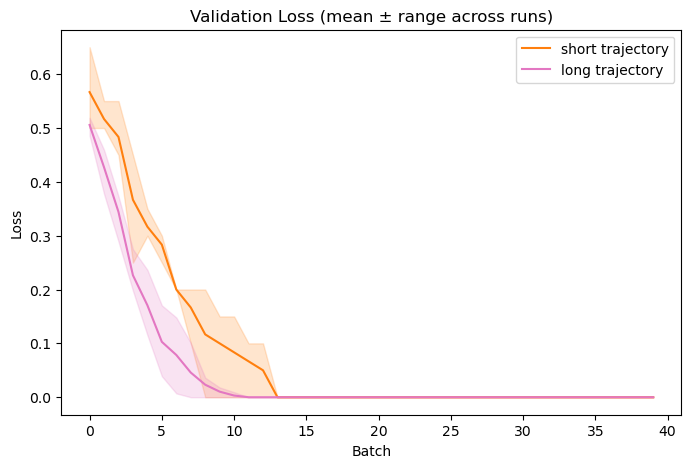


Experiment completed!


In [9]:
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes.main import main
main()

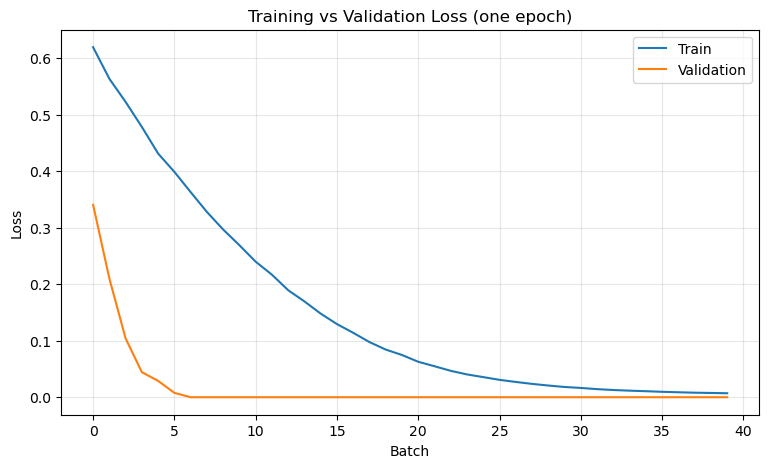

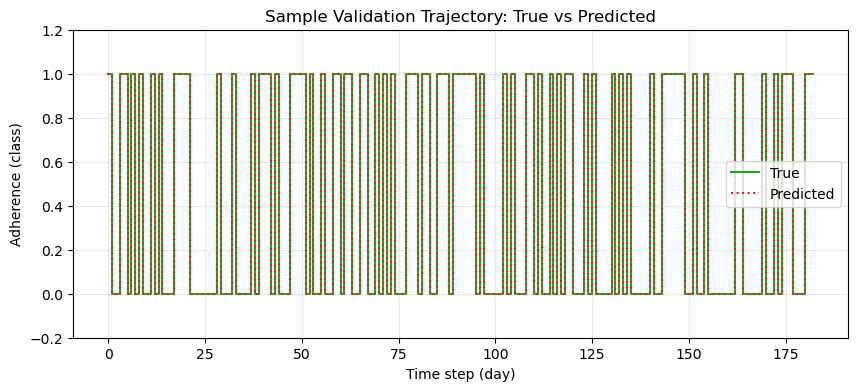

Shown validation sample index: 673 (of 1000 total)


In [ ]:
# Setup imports
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')  # parent of clean_ndes

import torch
import numpy as np
import matplotlib.pyplot as plt

from clean_ndes.config import (
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS,
    BATCH_SIZE, LEARNING_RATE, SEED
)
from clean_ndes.data_generation import generate_synthetic_data_super_simple
from clean_ndes.datasets import AdherenceDataset
from clean_ndes.model import AdherencePredictor
from clean_ndes.training import train_one_epoch
from torch.utils.data import random_split, DataLoader

# Reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)

# 1) Generate dataset
N, T, D = N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
data, adherence_dropped_at = generate_synthetic_data_super_simple(N, T, D)
dataset = AdherenceDataset(data)

# 2) 80/20 train-val split
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# 3) Create model and train for one epoch (collect per-batch losses)
model = AdherencePredictor(in_dim=D, out_dim=2)  # D includes adherence + controls
train_losses, val_losses = train_one_epoch(
    model, train_loader, val_loader, learning_rate=LEARNING_RATE, verbose=False
)

# 4) Plot convergence curves
plt.figure(figsize=(9, 5))
plt.plot(train_losses, label='Train', color='tab:blue')
plt.plot(val_losses, label='Validation', color='tab:orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (one epoch)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5) Plot a sample inference using one trajectory from the validation set
#    - pick a single sample from the underlying dataset via the Subset indices
val_indices = val_set.indices if hasattr(val_set, 'indices') else range(len(val_set))
sample_idx = val_indices[0]

X_val, Y_val = dataset[sample_idx]         # X_val: (T, D-1) controls, Y_val: (T,) adherence
T_sample = Y_val.shape[0]
ts = torch.arange(1, T_sample + 1)

# initial state y0 = [adherence_t0, controls_t0]
y0 = torch.cat([Y_val[0].unsqueeze(0), X_val[0]])

# roll out predicted trajectory
with torch.no_grad():
    traj_pred = model.solve_for_inference(ts=ts, cs=X_val, y0=y0)  # (T, D)
    y_pred = traj_pred[:, 0].long().cpu().numpy()                  # predicted adherence classes
    y_true = Y_val.long().cpu().numpy()



# Benchmark on real adherence dataset